In [ ]:

#Neccssary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
pip install powerbiclient

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 672.9/672.9 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.3 MB/s eta 0:00:00


In [ ]:
from powerbiclient import QuickVisualize, get_dataset_config, Report
from powerbiclient.authentication import DeviceCodeLoginAuthentication

import pandas as pd

In [ ]:
# pip install pandas-profiling

In [ ]:
# from pandas_profiling import ProfileReport
# pd.set_option('display.max_colwidth',None)
# %matplotlib inline

In [ ]:
# profile = ProfileReport(nba)

In [ ]:
#Loading Dataset
nba = pd.read_excel("/content/NBA.xlsx").set_index('Player').astype(float) #Setting all the columns as float values
print("Shape of the data= ", nba.shape)

Shape of the data=  (487, 30)


In [ ]:
# Create a Power BI report from your data
auth = DeviceCodeLoginAuthentication()

PBI_visualize = QuickVisualize(get_dataset_config(nba), auth=auth)

# Render the new report
PBI_visualize

Performing device flow authentication. Please follow the instructions below.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code CPHZLEBK5 to authenticate.

Device flow authentication successfully completed.
You are now logged in .

The result should be passed only to trusted code in your notebook.


QuickVisualize()

In [ ]:
PBI_visualize

QuickVisualize()

In [ ]:
# profile.to_notebook_iframe()

In [ ]:
# profile.to_file(output_file='Pandas ProfilingReport.html')

In [ ]:
nba.head()

,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,...,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP
Player,,,,,,,,,,,,,,,,,,,,,
Langston Galloway,8.8,1.8,6.5,4.1,58.3,14.5,100.78,7.4,0.2,1.14,...,73.3,100.0,88.4,3.3,1.20,0.9,1.94,1.25,1.6,1.32
Anfernee Simons,10.2,1.6,8.4,5.0,51.7,18.1,103.10,6.1,0.4,0.82,...,35.0,68.8,46.5,2.4,0.89,2.1,3.80,3.25,1.4,0.93
Bobby Portis,11.9,5.9,18.1,11.8,51.3,20.2,101.75,10.3,0.7,0.89,...,52.3,98.2,64.7,2.7,0.99,1.1,1.68,0.69,1.0,1.29
Coby White,15.5,1.7,13.0,6.9,47.7,22.3,102.28,7.6,0.2,1.17,...,28.0,78.6,50.2,3.4,0.94,2.7,3.82,3.21,2.5,1.06
Dorian Finney-Smith,6.8,6.7,11.2,9.0,59.4,12.8,99.37,7.1,1.0,0.84,...,56.8,96.6,76.1,3.8,1.03,1.1,1.85,0.85,1.6,1.24


In [ ]:
dfPlayerCol = nba.reset_index()

In [ ]:
#Understanding the data
features = list(nba.columns)
x= nba.loc[:, features].values

Data preprocessing

In [ ]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
Index: 487 entries, Langston Galloway to William Howard
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Advanced ASTpercent        487 non-null    float64
 1   Advanced OREBpercent       487 non-null    float64
 2   Advanced DREBpercent       487 non-null    float64
 3   Advanced REBpercent        487 non-null    float64
 4   Advanced TSpercent         487 non-null    float64
 5   Advanced USGpercent        487 non-null    float64
 6   Advanced PACE              487 non-null    float64
 7   Advanced PIE               487 non-null    float64
 8   postupdefense Poss         487 non-null    float64
 9   postupdefense PPP          487 non-null    float64
 10  Postupoffense Poss         487 non-null    float64
 11  Postupoffense PPP          487 non-null    float64
 12  putbacksoffense Poss       487 non-null    float64
 13  putbacksoffense PPP        4

In [ ]:
nba.corr()

,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,...,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP
Advanced ASTpercent,1.000000,-0.260667,-0.149772,-0.210765,-0.100454,0.548017,-0.055652,0.413967,0.053265,0.065497,...,-0.636983,-0.216446,-0.701020,0.030886,0.242107,0.846520,0.822452,0.799548,0.438213,0.063138
Advanced OREBpercent,-0.260667,1.000000,0.606861,0.816531,0.325613,-0.088012,-0.096689,0.339104,0.274015,0.089292,...,0.331771,-0.197676,0.125816,-0.352431,-0.313579,-0.234924,-0.437120,-0.473649,-0.253231,-0.004424
Advanced DREBpercent,-0.149772,0.606861,1.000000,0.948321,0.221387,0.063933,0.048675,0.460650,0.272842,0.112207,...,0.250565,-0.090776,0.182222,-0.180160,-0.237914,-0.154352,-0.402196,-0.450246,-0.111672,-0.019197
Advanced REBpercent,-0.210765,0.816531,0.948321,1.000000,0.306552,0.015527,0.000926,0.477397,0.300688,0.114435,...,0.318411,-0.133164,0.188911,-0.266726,-0.288502,-0.198036,-0.452916,-0.502708,-0.174516,-0.013001
Advanced TSpercent,-0.100454,0.325613,0.221387,0.306552,1.000000,0.031133,-0.149570,0.608443,0.314791,0.257363,...,0.298824,0.011030,0.196285,0.038251,0.215636,0.061710,-0.156395,-0.169038,0.121204,0.306861
Advanced USGpercent,0.548017,-0.088012,0.063933,0.015527,0.031133,1.000000,-0.084734,0.589177,0.191858,0.152259,...,-0.472000,-0.114398,-0.532717,0.293022,0.291341,0.655753,0.508108,0.470920,0.615150,0.178723
Advanced PACE,-0.055652,-0.096689,0.048675,0.000926,-0.149570,-0.084734,1.000000,-0.151234,-0.140876,-0.128859,...,0.049538,0.025422,0.127610,-0.106011,-0.097657,-0.161182,-0.109556,-0.090553,-0.029318,-0.147092
Advanced PIE,0.413967,0.339104,0.460650,0.477397,0.608443,0.589177,-0.151234,1.000000,0.411307,0.301882,...,-0.118393,-0.092979,-0.257676,0.112941,0.296614,0.511227,0.224292,0.176536,0.440740,0.351122
postupdefense Poss,0.053265,0.274015,0.272842,0.300688,0.314791,0.191858,-0.140876,0.411307,1.000000,0.719899,...,0.124194,-0.025375,0.014835,0.272703,0.244081,0.250565,-0.089963,-0.116378,0.307804,0.437420
postupdefense PPP,0.065497,0.089292,0.112207,0.114435,0.257363,0.152259,-0.128859,0.301882,0.719899,1.000000,...,0.070058,0.084134,-0.003998,0.350214,0.355901,0.259562,-0.017258,-0.034050,0.354878,0.478916


<Axes: >

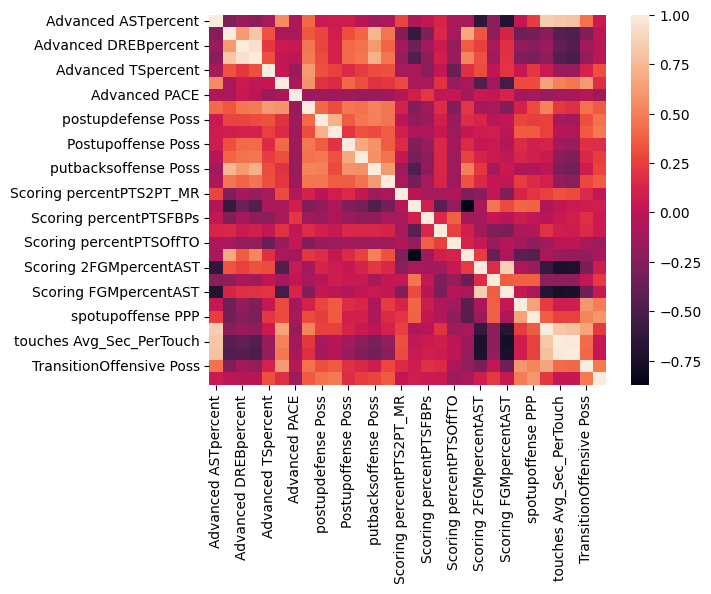

In [ ]:
sns.heatmap(nba.corr())

In [ ]:
#Checking for any outliers
# calculate z-scores for each column
z_scores = np.abs((nba - nba.mean()) / nba.std())

# identify rows with outlier values (z-score > 3)
outliers = nba[z_scores > 3].dropna(how='all')

# print the outliers
print(outliers)

                       Advanced ASTpercent  Advanced OREBpercent  \
Player                                                             
Nikola Jokic                           NaN                   NaN   
Damian Lillard                         NaN                   NaN   
Devonte' Graham                        NaN                   NaN   
Ben Simmons                            NaN                   NaN   
Robert Covington                       NaN                   NaN   
Rudy Gobert                            NaN                   NaN   
Andre Drummond                         NaN                   NaN   
Andre Drummond                         NaN                   NaN   
Hassan Whiteside                       NaN                   NaN   
James Harden                           NaN                   NaN   
Jonas Valanciunas                      NaN                   NaN   
LeBron James                          47.9                   NaN   
Mitchell Robinson                      NaN      

In [ ]:
#Standardisng the data using StandardScaler
x= StandardScaler().fit_transform(x)

In [ ]:
#Performing the PCA on the data to remove any outliers and dimensionality reduction
variance_list = [] #empty list to store variances
for n_components in range(2, 31):
    pca = PCA(n_components = n_components)
    components = pca.fit_transform(x)
    pca_variance = sum(pca.explained_variance_ratio_)
    variance_list.append(pca_variance)
    print("For n_components = {}, explained variance ratio is {}".format(n_components, pca_variance))

For n_components = 2, explained variance ratio is 0.4392580057127526
For n_components = 3, explained variance ratio is 0.567629045388278
For n_components = 4, explained variance ratio is 0.6268184169226136
For n_components = 5, explained variance ratio is 0.6755451751246613
For n_components = 6, explained variance ratio is 0.7169413050732255
For n_components = 7, explained variance ratio is 0.7490113047677628
For n_components = 8, explained variance ratio is 0.7782932819597763
For n_components = 9, explained variance ratio is 0.8053024983551439
For n_components = 10, explained variance ratio is 0.8287327218042011
For n_components = 11, explained variance ratio is 0.8506660305368816
For n_components = 12, explained variance ratio is 0.8717631452074833
For n_components = 13, explained variance ratio is 0.8886322192886176
For n_components = 14, explained variance ratio is 0.9044923898506937
For n_components = 15, explained variance ratio is 0.9189769957564601
For n_components = 16, explai

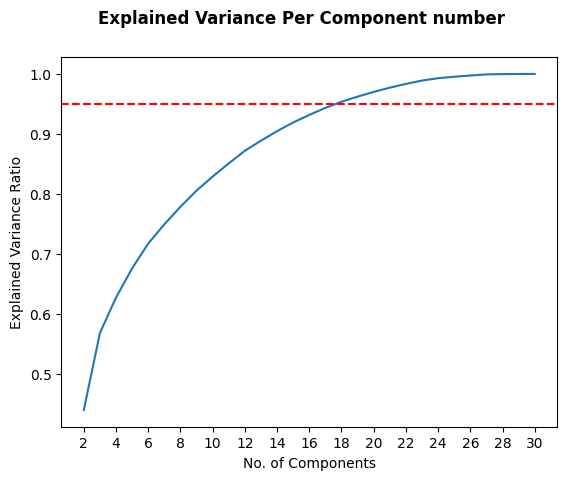

In [ ]:
pca_fig, ax = plt.subplots()
ax.plot(range(2, 31), variance_list)
ax.set_xlabel('No. of Components')
ax.set_ylabel('Explained Variance Ratio')
ax.set_xticks(np.arange(2, 32, 2.0))
threshold = 0.95
plt.axhline(y=threshold, color='r', linestyle='--')
pca_fig.suptitle("Explained Variance Per Component number", weight = 'bold');

In [ ]:
from numpy import diff
dx = 1
y = variance_list
dy = diff(y)/dx
print(dy)

[1.28371040e-01 5.91893715e-02 4.87267582e-02 4.13961299e-02
 3.20699997e-02 2.92819772e-02 2.70092164e-02 2.34302234e-02
 2.19333087e-02 2.10971147e-02 1.68690741e-02 1.58601706e-02
 1.44846059e-02 1.26465426e-02 1.16658908e-02 1.02577081e-02
 8.53678279e-03 7.93402940e-03 7.01946784e-03 6.30805203e-03
 5.58828216e-03 3.90799990e-03 2.47141243e-03 2.01921057e-03
 1.85967033e-03 5.10781019e-04 2.09069487e-04 8.81047457e-05]


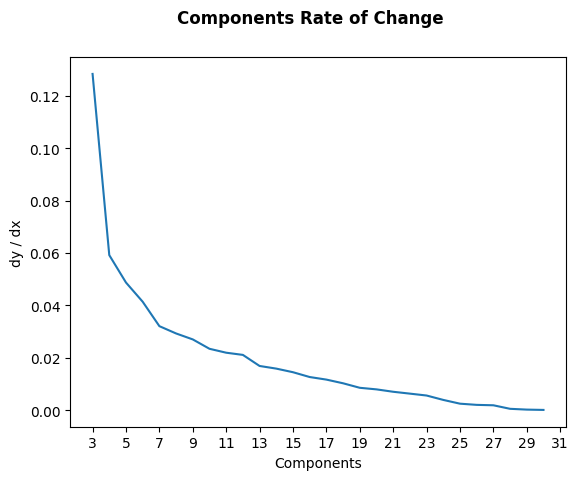

In [ ]:
#Elbow method for determining the number of clusters
pca_deriv, ax = plt.subplots()
ax.plot(range(3, 31), dy)
ax.set_xlabel('Components')
ax.set_ylabel('dy / dx')
ax.set_xticks(np.arange(3, 32, 2.0))
pca_deriv.suptitle("Components Rate of Change", weight = 'bold');

From the above elbow curve it is clear that either 7 or 13 is the point of considering K value, since a stable decreasing curve is observed after 13 components we would consider K = 13

In [ ]:
#Making of the cluster by taking the number of clusters to be 13
pca = PCA(n_components = 16)
components = pca.fit_transform(x)
pca_df = pd.DataFrame(data = components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6',
                                                   'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12',
                 'PC 13', 'PC 14', 'PC 15', 'PC 16'])


In [ ]:
pca_df['Player'] = dfPlayerCol['Player']
pca_df = pca_df[['Player', 'PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12',
                 'PC 13', 'PC 14', 'PC 15', 'PC 16' ]]
pca_df.head()

,Player,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15,PC 16
0,Langston Galloway,-0.629264,-1.488003,-3.224213,0.429696,-0.989677,-0.307569,-0.320236,0.388100,-0.168554,0.233534,0.018514,0.162524,-0.264568,-0.031287,0.087356,0.319811
1,Anfernee Simons,-2.552319,-0.620829,0.031621,-0.291686,-0.299234,-0.845852,0.996665,0.410733,0.063045,-0.192359,-0.278499,0.476688,-0.713373,0.133699,-0.028859,-0.457583
2,Bobby Portis,1.905637,1.812714,-1.245174,-0.613802,1.465176,-1.442102,0.345435,-0.248346,-0.164198,-0.013879,-0.502754,-0.111269,-0.157939,0.555113,-0.226209,-0.143470
3,Coby White,-2.888972,0.151796,-0.401778,0.659674,0.342884,0.095026,0.584003,-0.854632,-0.088465,0.647163,0.234574,0.269422,-0.047146,0.077952,0.479681,-1.069163
4,Dorian Finney-Smith,1.212326,-0.040621,-2.433643,0.881384,-1.346852,-0.250738,-0.215710,-1.336844,0.337995,0.558351,-0.081923,0.766397,-0.000821,0.024297,-0.546647,0.225020


In [ ]:
print(pca.explained_variance_ratio_)

[0.23260274 0.20665526 0.12837104 0.05918937 0.04872676 0.04139613
 0.03207    0.02928198 0.02700922 0.02343022 0.02193331 0.02109711
 0.01686907 0.01586017 0.01448461 0.01264654]


In [ ]:
print(sum(pca.explained_variance_ratio_))

0.9316235383352992


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

In [ ]:
#Using the silhouette score to determine the clusters data
x = np.column_stack((pca_df['PC 1'], pca_df['PC 2'], pca_df['PC 3'], pca_df['PC 4'], pca_df['PC 5'],
                     pca_df['PC 6'], pca_df['PC 7'], pca_df['PC 8'], pca_df['PC 9'], pca_df['PC 10'], pca_df['PC 11'],
                     pca_df['PC 12'], pca_df['PC 13'], pca_df['PC 14'], pca_df['PC 15'], pca_df['PC 16']))

silhouette = []

for n_clusters in range(2, 20):
    kmeans = KMeans(n_clusters = n_clusters,n_init=10,  random_state = 99)
    cluster_labels = kmeans.fit_predict(x)

    centers = kmeans.cluster_centers_

    score = silhouette_score(x, cluster_labels)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.21057942664428966
For n_clusters = 3, silhouette score is 0.20506848712796116
For n_clusters = 4, silhouette score is 0.20011995659108833
For n_clusters = 5, silhouette score is 0.19024731914798682
For n_clusters = 6, silhouette score is 0.16789264085233263
For n_clusters = 7, silhouette score is 0.17395800684764434
For n_clusters = 8, silhouette score is 0.1272680923878215
For n_clusters = 9, silhouette score is 0.13051831290350227
For n_clusters = 10, silhouette score is 0.1318469235074183
For n_clusters = 11, silhouette score is 0.13518697812059696
For n_clusters = 12, silhouette score is 0.12798869758639583
For n_clusters = 13, silhouette score is 0.125638211147404
For n_clusters = 14, silhouette score is 0.12978159413006396
For n_clusters = 15, silhouette score is 0.12403886360425478
For n_clusters = 16, silhouette score is 0.133073027064359
For n_clusters = 17, silhouette score is 0.11667653958725241
For n_clusters = 18, silhouette score 

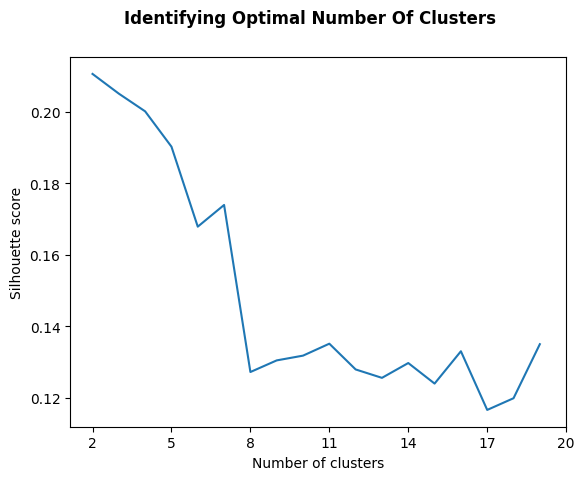

In [ ]:
#Plotting for the number of clusters to be selected
silhouette_fig, ax = plt.subplots()
ax.plot(range(2, 20), silhouette)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')
ax.set_xticks(np.arange(2, 21, 3.0))
silhouette_fig.suptitle("Identifying Optimal Number Of Clusters", weight = 'bold')
silhouette_fig.savefig('silhouette-score.png', dpi = 400, bbox_inches = 'tight')

In [ ]:
#Relative cluster amount
silhouette_diff = []

for i in range(1, len(silhouette)):
    improvement = 1 - ((1 - silhouette[i]) / (1 - silhouette[i - 1]))
    silhouette_diff.append(improvement)
    print("For n_cluster = {}, percent improvement = {}".format(i + 2, improvement))

For n_cluster = 3, percent improvement = -0.006980993024924942
For n_cluster = 4, percent improvement = -0.006225102989053877
For n_cluster = 5, percent improvement = -0.012342647531280448
For n_cluster = 6, percent improvement = -0.027606797512708114
For n_cluster = 7, percent improvement = 0.007289162784865133
For n_cluster = 8, percent improvement = -0.05652244661514594
For n_cluster = 9, percent improvement = 0.003724191229095064
For n_cluster = 10, percent improvement = 0.001528048978642449
For n_cluster = 11, percent improvement = 0.0038473106916498967
For n_cluster = 12, percent improvement = -0.008323510807640044
For n_cluster = 13, percent improvement = -0.002695477033939797
For n_cluster = 14, percent improvement = 0.0047387512074346105
For n_cluster = 15, percent improvement = -0.006599183017817589
For n_cluster = 16, percent improvement = 0.010313429540123709
For n_cluster = 17, percent improvement = -0.01891334332531347
For n_cluster = 18, percent improvement = 0.003700610

<ipython-input-25-3dbafd05389a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


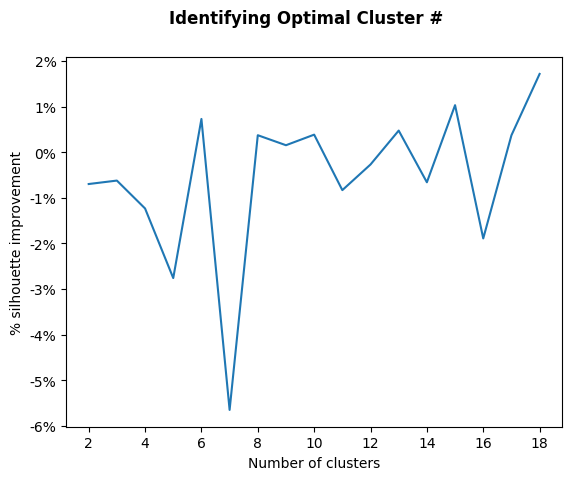

In [ ]:
silhouette_imp_fig, ax = plt.subplots()

ax.plot(range(2, 19), silhouette_diff)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('% silhouette improvement')

ax.set_xticks(np.arange(2, 19, 2.0))

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

silhouette_imp_fig.suptitle("Identifying Optimal Cluster #", weight = 'bold');

In [ ]:
#Building the KMeans Model
kmeans = KMeans(n_clusters = 14, random_state = 1)
kmeans.fit(x)

y_kmeans = kmeans.predict(x)

df_cluster = pd.DataFrame()

df_cluster['Player'] = dfPlayerCol['Player']
df_cluster['Cluster'] = y_kmeans

pd.DataFrame.to_excel(df_cluster, "playerClusterNew2020.xlsx")

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


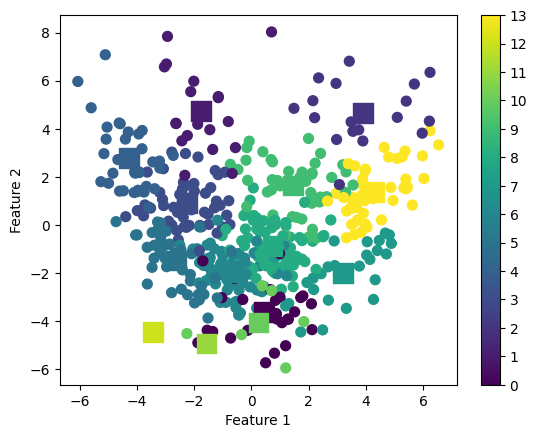

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot of the players' data points, colored by their assigned cluster
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Add labels for the x- and y-axis
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Add a legend
cluster_centers = kmeans.cluster_centers_
cluster_labels = np.arange(0, 14)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c=cluster_labels, s=200, cmap='viridis', marker='s')
plt.colorbar(ticks=cluster_labels)
plt.show()


In [ ]:
print(kmeans.labels_)

[ 6  3  9  3  8  8 13  3  6  8  8  3  2  3  3  9  3  1  2  6  3  6  3  0
  4  3  3  4  3  4  3  6  3  6  9 13  9  3  6  6  6  6  6  4  8  9  2  9
  8  8  6  6  0  8  5  1  9  3  9  8  3  9  3  4 13  4 13  3  3  3  3  3
  3  3  3  2  8  8  4  4  8  6  3  9  3  8  1  3  1  2  9  9  3 13  8  4
  3  8  8 13  9 13  7  3  2  2 13  2 13  8  4  2  8  3  3  1  8 13  9  6
  6  3  6  9  6  6 13  3  9  8  8  6  1  2 13 13  8  9  6  4 13  8 13  9
  3  3  8  5  8  9  9 13  6  8 13  8  9  6  6  1  8  4  8  8  8  8  4  4
  4  4  5  8  9  8  8  3 13  1 13  9  9  1  6  3  6  6  9  4  6  2  1  4
  6  8  1  1  4  9  9  8  9  5 13  3  1 13 13  6 13  4  5  3  4  4  5  3
  9  9  8  3  1  8  8  8  6  3  9  3  9  1  6  6  6  6  9  2  1  5  9  3
  8  6  4  4  3 13  6  6 13  8  8  8  8  8  8  3  2  7  1  3  9  6  8  5
  3  9  7  3  4  5  6 13  8 13  9  8 13  3  5  5  3  4  4  6  6 13  4  8
  8  2  8  8  8  8  6 13 13  6  8  4  8  8  7  8 13  9  8  8  6 13  8 13
  6  6  4 13  4  0  4  8  2  8  8  9  9  1  5  5  9

In [ ]:
# Evaluate the clustering results using ARI, NMI, and silhouette score
from sklearn import metrics

# ari = metrics.adjusted_rand_score(y_true, y_kmeans)
# nmi = metrics.normalized_mutual_info_score(y_true, y_kmeans)
silhouette_score = metrics.silhouette_score(x, y_kmeans)

# Print the evaluation metrics
# print("Adjusted Rand Index (ARI): {:.2f}".format(ari))
# print("Normalized Mutual Information (NMI): {:.2f}".format(nmi))
print("Silhouette Score: {:.2f}".format(silhouette_score))

Silhouette Score: 0.13


In [ ]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=15) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours

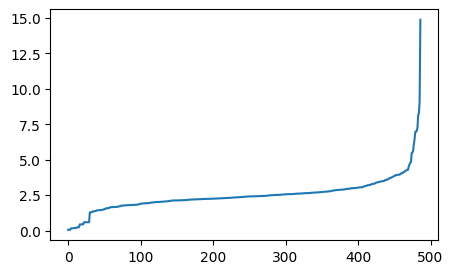

In [ ]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

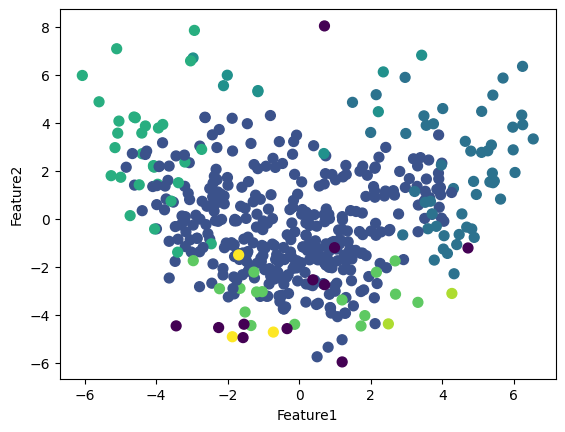

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def dbscan_clustering(data, eps, min_samples):
    labels = np.zeros(data.shape[0], dtype=int)
    cluster_idx = 0
    for i in range(data.shape[0]):
        if labels[i] != 0:
            continue
        neighbors = get_neighbors(data, i, eps)
        if len(neighbors) < min_samples:
            labels[i] = -1
            continue
        cluster_idx += 1
        labels[i] = cluster_idx
        expand_cluster(data, labels, i, neighbors, cluster_idx, eps, min_samples)
    return labels

def get_neighbors(data, i, eps):
    return np.where(np.linalg.norm(data - data[i], axis=1) < eps)[0]

def expand_cluster(data, labels, i, neighbors, cluster_idx, eps, min_samples):
    for j in neighbors:
        if labels[j] == -1:
            labels[j] = cluster_idx
        elif labels[j] == 0:
            labels[j] = cluster_idx
            neighbors_j = get_neighbors(data, j, eps)
            if len(neighbors_j) >= min_samples:
                neighbors = np.concatenate((neighbors, neighbors_j))

# Cluster the data into five clusters
labels = dbscan_clustering(x, eps=7.5, min_samples=60)

# Plot the clusters
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')
plt.xlabel("Feature1") # X-axis label
plt.ylabel("Feature2") # Y-axis label
plt.show()


In [ ]:
labels

array([ 1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,
        1,  2,  1,  1,  1,  1,  1,  4,  1,  1,  4,  1,  4,  1,  1,  1,  1,
        1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  4,  2,  1,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  4,  4,  1,  1,  1,  1,  1,
        1,  3,  1,  1,  2,  1,  1,  1,  1,  1,  4,  1,  1,  1,  2,  1,  1,
        1,  1,  2,  2,  1,  2,  2,  1,  4,  2,  1,  1,  1,  3,  1,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  1,
        1,  1,  1,  4,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  4,  1,  1,  1,  1,  4,  4,  4,  4,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  1,  4,  1,  1,  3,  1,  1,  2,  1,  1,  1,  1,  1,  1,
        1,  2,  1,  1,  2,  4,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,
        1,  1,  1,  1,  1

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score = silhouette_score(x, labels)

# Print the silhouette score
print("Silhouette Score for GMM: {:.2f}".format(silhouette_score))

Silhouette Score for GMM: 0.12


In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=7)
gmm.fit(x)

GaussianMixture(n_components=7)

In [ ]:
label_gmm = gmm.predict(x)

In [ ]:
df_gmm = pd.DataFrame()

df_gmm['Player'] = dfPlayerCol['Player']
df_gmm['Cluster'] = label_gmm

pd.DataFrame.to_excel(df_gmm, "playergmmNew2020.xlsx")

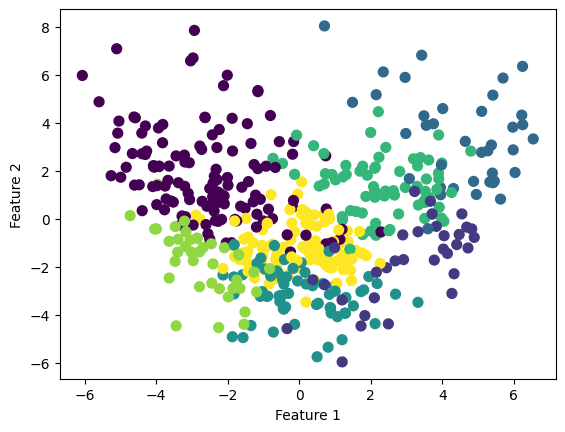

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of the players' data points, colored by their assigned cluster
plt.scatter(x[:, 0], x[:, 1], c=label_gmm, s=50, cmap='viridis')

# Add labels for the x- and y-axis
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score = silhouette_score(x, label_gmm)

# Print the silhouette score
print("Silhouette Score for GMM: {:.2f}".format(silhouette_score))


Silhouette Score for GMM: 0.11
